In [1]:
from sklearn import tree
from sklearn import datasets
from sklearn.metrics import accuracy_score, recall_score
import pydotplus
import pandas as pn
import numpy as np

In [55]:
pwd

'C:\\Users\\jim87\\Desktop\\Colab Notebooks'

In [56]:
adult_x_train = pn.read_csv('adult.data', header=None,  names=["age","workclass","fnlwgt","education","education_num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","money"])
adult_x_test = pn.read_csv('adult.test', skiprows = 1, header=None,  names=["age","workclass","fnlwgt","education","education_num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","money"])

In [57]:
adult_x_train

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [58]:
adult_x_test

,age,workclass,fnlwgt,education,education_num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,money
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


# #資料量化

In [59]:
def dataCleaning(dataSet):
    #删去不相關欄位
    dataSet.drop('fnlwgt',axis=1, inplace=True)         
    dataSet.drop('education',axis=1, inplace=True)      
    dataSet.drop('capital-gain',axis=1, inplace=True)   
    dataSet.drop('capital-loss',axis=1, inplace=True)   
    dataSet = dataSet.replace(' ?', np.nan)
    #缺失值處理，採用眾數替換法（mode（）方法取眾數）
    dataSet.fillna(value={'workclass':dataSet['workclass'].mode()[0],   #Workclass
                          'occupation':dataSet['occupation'].mode()[0],   #Occupation  
                          'native-country':dataSet['native-country'].mode()[0]}, #Native country
              inplace = True)  
    
    #量化_換成number 0 1 2 3 (量化)
    workclass = list(set(dataSet['workclass']))
    for i in range(len(workclass)):
        row = dataSet['workclass'] == workclass[i]
        dataSet.loc[row,'workclass'] = i
    dataSet['workclass'] = dataSet['workclass'].astype(np.int64)
    
    maritalStatus = list(set(dataSet['marital-status']))
    for i in range(len(maritalStatus)):
        row = dataSet['marital-status'] == maritalStatus[i]
        dataSet.loc[row,'marital-status'] = i
    dataSet['marital-status'] = dataSet['marital-status'].astype(np.int64)
        
    occupation = list(set(dataSet['occupation']))
    for i in range(len(occupation)):
        row = dataSet['occupation'] == occupation[i]
        dataSet.loc[row,'occupation'] = i
    dataSet['occupation'] = dataSet['occupation'].astype(np.int64)
    
    relationship = list(set(dataSet['relationship']))
    for i in range(len(relationship)):
        row = dataSet['relationship'] == relationship[i]
        dataSet.loc[row,'relationship'] = i
    dataSet['relationship'] = dataSet['relationship'].astype(np.int64)
    
    race = list(set(dataSet['race']))
    for i in range(len(race)):
        row = dataSet['race'] == race[i]
        dataSet.loc[row,'race'] = i
    dataSet['race'] = dataSet['race'].astype(np.int64)
    
    sex = list(set(dataSet['sex']))
    for i in range(len(sex)):
        row = dataSet['sex'] == sex[i]
        dataSet.loc[row,'sex'] = i
    dataSet['sex'] = dataSet['sex'].astype(np.int64)
    
    nativeCountry = list(set(dataSet['native-country']))
    for i in range(len(nativeCountry)):
        row = dataSet['native-country'] == nativeCountry[i]
        dataSet.loc[row,'native-country'] = i
    dataSet['native-country'] = dataSet['native-country'].astype(np.int64)
    
    money = {' <=50K': 0, ' >50K': 1,' <=50K.': 0, ' >50K.': 1}
    try:
        dataSet['money'] = dataSet['money'].map(money)
    except:
        i = 1#不做处理
    else:
        i = 1
        
    
    
    return dataSet
    

In [60]:
adult_x_train = dataCleaning(adult_x_train)
adult_x_train

,age,workclass,education_num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,money
0,39,1,13,2,3,4,2,1,40,33,0
1,50,2,13,3,8,0,2,1,13,33,0
2,38,7,9,6,4,4,2,1,40,33,0
3,53,7,7,3,4,0,4,1,40,33,0
4,28,7,13,3,0,5,4,0,40,34,0
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,7,12,3,7,5,2,0,38,33,0
32557,40,7,9,3,12,0,2,1,40,33,1
32558,58,7,9,5,3,1,2,0,40,33,0
32559,22,7,9,2,3,3,2,1,20,33,0


In [61]:
adult_x_test = dataCleaning(adult_x_test)
adult_x_test

,age,workclass,education_num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,money
0,25,7,7,2,12,3,4,1,40,32,0
1,38,7,9,3,6,0,2,1,50,32,0
2,28,3,12,3,8,0,2,1,40,32,1
3,44,7,10,3,12,0,4,1,40,32,1
4,18,7,10,2,0,3,2,0,30,32,0
...,...,...,...,...,...,...,...,...,...,...,...
16276,39,7,13,6,0,4,2,0,36,32,0
16277,64,7,9,5,0,2,4,1,40,32,0
16278,38,7,13,3,0,0,2,1,50,32,0
16279,44,7,13,6,3,3,3,1,40,32,0


In [62]:
adult_x_train.isnull().sum()

age               0
workclass         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
money             0
dtype: int64

In [63]:
adult_x_test.isnull().sum()

age               0
workclass         0
education_num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
money             0
dtype: int64

In [64]:
adult_x_test.dtypes

age               int64
workclass         int64
education_num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
hours-per-week    int64
native-country    int64
money             int64
dtype: object

In [65]:
#設定答案
adult_y_train = adult_x_train.pop('money')
adult_y_test = adult_x_test.pop('money')

In [66]:
adult_y_train

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: money, Length: 32561, dtype: int64

In [67]:
adult_y_test

0        0
1        0
2        1
3        1
4        0
        ..
16276    0
16277    0
16278    0
16279    0
16280    1
Name: money, Length: 16281, dtype: int64

In [68]:
adult_x_train

,age,workclass,education_num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country
0,39,1,13,2,3,4,2,1,40,33
1,50,2,13,3,8,0,2,1,13,33
2,38,7,9,6,4,4,2,1,40,33
3,53,7,7,3,4,0,4,1,40,33
4,28,7,13,3,0,5,4,0,40,34
...,...,...,...,...,...,...,...,...,...,...
32556,27,7,12,3,7,5,2,0,38,33
32557,40,7,9,3,12,0,2,1,40,33
32558,58,7,9,5,3,1,2,0,40,33
32559,22,7,9,2,3,3,2,1,20,33


# #決策樹模型輸出

In [16]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy').fit(adult_x_train,adult_y_train)

In [17]:
clf.score(adult_x_train,adult_y_train)

0.9666779275820767

In [18]:
clf.predict(adult_x_test)

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [19]:
clf.score(adult_x_test,adult_y_test)

0.7834285363306922

# #過度配適初步調整

In [45]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=2).fit(adult_x_train,adult_y_train)

In [46]:
clf.score(adult_x_train,adult_y_train)

0.8137035103344492

In [47]:
clf.predict(adult_x_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [48]:
clf.score(adult_x_test,adult_y_test)

0.8148148148148148

[Text(167.4, 181.2, 'X[5] <= 0.5\nentropy = 0.796\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(83.7, 108.72, 'X[2] <= 12.5\nentropy = 0.992\nsamples = 13193\nvalue = [7275, 5918]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.915\nsamples = 9224\nvalue = [6178, 3046]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.85\nsamples = 3969\nvalue = [1097, 2872]'),
 Text(251.10000000000002, 108.72, 'X[5] <= 4.5\nentropy = 0.467\nsamples = 19368\nvalue = [17445, 1923]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.352\nsamples = 17800\nvalue = [16622, 1178]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.998\nsamples = 1568\nvalue = [823, 745]')]

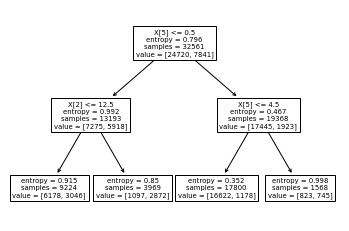

In [49]:
tree.plot_tree(clf)

In [38]:
dot_data = tree.export_graphviz(clf,out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('adult_entropy_max3.pdf')

True

In [39]:
df_outer = adult_x_test.join(adult_y_test, how='outer')
df_outer['predict'] = clf.predict(adult_x_test)
df_outer['result'] = (df_outer['money'] == df_outer['predict'])
df_outer.to_excel("adult_entropy_max3.xlsx")  

# #Gini

In [50]:
clf=tree.DecisionTreeClassifier(criterion='gini',max_depth=6).fit(adult_x_train,adult_y_train)

In [51]:
clf.score(adult_x_train,adult_y_train)

0.8310248456742729

In [52]:
clf.predict(adult_x_test)

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [53]:
clf.score(adult_x_test,adult_y_test)

0.8298016092377618

[Text(163.5498, 201.90857142857143, 'X[5] <= 0.5\ngini = 0.366\nsamples = 32561\nvalue = [24720, 7841]'),
 Text(78.0084, 170.84571428571428, 'X[2] <= 12.5\ngini = 0.495\nsamples = 13193\nvalue = [7275, 5918]'),
 Text(35.4888, 139.78285714285715, 'X[2] <= 8.5\ngini = 0.442\nsamples = 9224\nvalue = [6178, 3046]'),
 Text(14.7312, 108.72, 'X[0] <= 35.5\ngini = 0.218\nsamples = 1495\nvalue = [1309, 186]'),
 Text(5.3568, 77.65714285714284, 'X[9] <= 12.5\ngini = 0.106\nsamples = 374\nvalue = [353, 21]'),
 Text(2.6784, 46.59428571428572, 'gini = 0.0\nsamples = 90\nvalue = [90, 0]'),
 Text(8.0352, 46.59428571428572, 'X[9] <= 15.5\ngini = 0.137\nsamples = 284\nvalue = [263, 21]'),
 Text(5.3568, 15.531428571428563, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(10.7136, 15.531428571428563, 'gini = 0.131\nsamples = 283\nvalue = [263, 20]'),
 Text(24.1056, 77.65714285714284, 'X[2] <= 5.5\ngini = 0.251\nsamples = 1121\nvalue = [956, 165]'),
 Text(18.7488, 46.59428571428572, 'X[8] <= 54.5\ngini = 

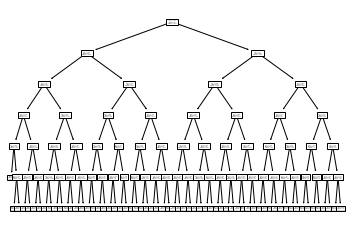

In [54]:
tree.plot_tree(clf)

In [31]:
dot_data = tree.export_graphviz(clf,out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('adult_gini_max3.pdf')

True

In [32]:
df_outer = adult_x_test.join(adult_y_test, how='outer')
df_outer['predict'] = clf.predict(adult_x_test)
df_outer['result'] = (df_outer['money'] == df_outer['predict'])
df_outer.to_excel("adult_gini_max3.xlsx")  